<a href="https://colab.research.google.com/github/urmilapol/python-course/blob/master/stockpred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Preduction Using Neuro Network

In [5]:
import pandas as pd

In [6]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import yfinance as yf

## Enter the Stock Symbol Name for Stock 

In [8]:
symbol = input("Enter the Symbol :-")

Enter the Symbol :-TCS


In [9]:
symbol_yf = symbol+'.NS'

In [10]:
msft = yf.Ticker(symbol_yf)

In [11]:
hist = msft.history(period="max")

## Max Data of Stock

In [12]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-08-12 00:00:00+05:30,28.348261,29.281614,28.348261,29.062002,212976,0.0,0.0
2002-08-13 00:00:00+05:30,29.098608,29.565285,28.458073,28.668533,153576,0.0,0.0
2002-08-14 00:00:00+05:30,28.732594,28.732594,26.152150,26.692032,822776,0.0,0.0
2002-08-15 00:00:00+05:30,26.692032,26.692032,26.692032,26.692032,0,0.0,0.0
2002-08-16 00:00:00+05:30,26.554771,27.817539,26.170448,26.627974,811856,0.0,0.0
...,...,...,...,...,...,...,...
2022-10-14 00:00:00+05:30,3136.881645,3141.868738,3063.072665,3091.149902,2245977,0.0,0.0
2022-10-17 00:00:00+05:30,3072.649902,3128.399902,3071.449951,3111.750000,1517005,8.0,0.0
2022-10-18 00:00:00+05:30,3150.000000,3155.350098,3128.550049,3144.699951,1793722,0.0,0.0


In [13]:
df = hist.reset_index()

In [14]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12 00:00:00+05:30,28.348261,29.281614,28.348261,29.062002,212976,0.0,0.0
1,2002-08-13 00:00:00+05:30,29.098608,29.565285,28.458073,28.668533,153576,0.0,0.0
2,2002-08-14 00:00:00+05:30,28.732594,28.732594,26.152150,26.692032,822776,0.0,0.0
3,2002-08-15 00:00:00+05:30,26.692032,26.692032,26.692032,26.692032,0,0.0,0.0
4,2002-08-16 00:00:00+05:30,26.554771,27.817539,26.170448,26.627974,811856,0.0,0.0
...,...,...,...,...,...,...,...,...
5012,2022-10-14 00:00:00+05:30,3136.881645,3141.868738,3063.072665,3091.149902,2245977,0.0,0.0
5013,2022-10-17 00:00:00+05:30,3072.649902,3128.399902,3071.449951,3111.750000,1517005,8.0,0.0
5014,2022-10-18 00:00:00+05:30,3150.000000,3155.350098,3128.550049,3144.699951,1793722,0.0,0.0
5015,2022-10-19 00:00:00+05:30,3159.000000,3159.000000,3112.000000,3121.850098,1194289,0.0,0.0


In [15]:
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

## Convert Date to Datetime

In [16]:
df['Date'] = pd.to_datetime(df.Date)

## Shape of data

In [17]:
df.shape

(5017, 8)

## Check for null values

In [18]:
df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [19]:
df.isna().any()

Date            False
Open            False
High            False
Low             False
Close           False
Volume          False
Dividends       False
Stock Splits    False
dtype: bool

## Infromation about data

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5017 entries, 0 to 5016
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                       
---  ------        --------------  -----                       
 0   Date          5017 non-null   datetime64[ns, Asia/Kolkata]
 1   Open          5017 non-null   float64                     
 2   High          5017 non-null   float64                     
 3   Low           5017 non-null   float64                     
 4   Close         5017 non-null   float64                     
 5   Volume        5017 non-null   int64                       
 6   Dividends     5017 non-null   float64                     
 7   Stock Splits  5017 non-null   float64                     
dtypes: datetime64[ns, Asia/Kolkata](1), float64(6), int64(1)
memory usage: 313.7 KB


## Describe the data

In [21]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,5017.000000,5017.000000,5017.000000,5017.000000,5.017000e+03,5017.000000,5017.000000
mean,941.453902,951.534583,930.563714,940.904781,3.282642e+06,0.073998,0.001196
std,988.475519,997.664152,978.231808,987.774340,3.212893e+06,0.984726,0.048897
min,23.773010,26.682877,23.773010,25.969130,0.000000e+00,0.000000,0.000000
25%,168.329021,171.871909,164.119795,168.032837,1.691923e+06,0.000000,0.000000
50%,518.712471,523.057272,513.046527,518.086182,2.597408e+06,0.000000,0.000000
75%,1179.229096,1192.977408,1166.855867,1178.672485,4.081208e+06,0.000000,0.000000
max,3979.101503,3988.028746,3925.885093,3964.502930,8.806715e+07,40.000000,2.000000


In [22]:
print(len(df))

5017


## Ploting the Data using open values

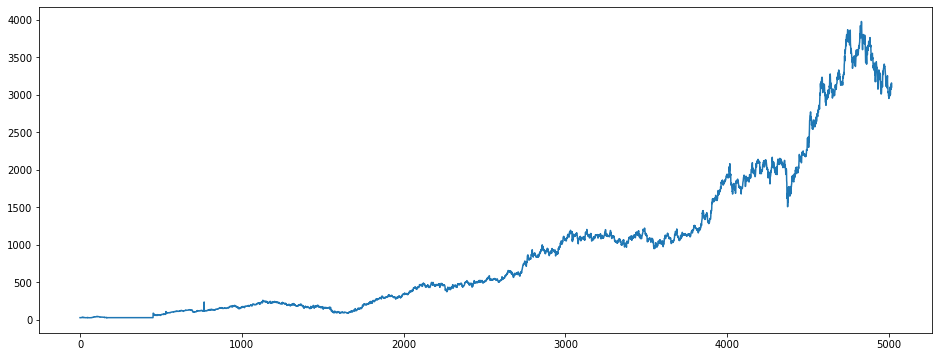

In [23]:
df['Open'].plot(figsize=(16,6))

In [24]:
x = df[['Open','High','Low','Volume']]
y = df['Close']

## Spliting the data for training and testing

In [25]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x ,y , random_state = 0 )

In [26]:
x_train.shape

(3762, 4)

In [27]:
x_test.shape

(1255, 4)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5017 entries, 0 to 5016
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                       
---  ------        --------------  -----                       
 0   Date          5017 non-null   datetime64[ns, Asia/Kolkata]
 1   Open          5017 non-null   float64                     
 2   High          5017 non-null   float64                     
 3   Low           5017 non-null   float64                     
 4   Close         5017 non-null   float64                     
 5   Volume        5017 non-null   int64                       
 6   Dividends     5017 non-null   float64                     
 7   Stock Splits  5017 non-null   float64                     
dtypes: datetime64[ns, Asia/Kolkata](1), float64(6), int64(1)
memory usage: 313.7 KB


## If any Replace NA values with 0 

In [30]:
df.Open = df.Open.fillna(0)
df.High = df.High.fillna(0)
df.Low = df.Low.fillna(0)
df.Close = df.Close.fillna(0)
df.Volume = df.Volume.fillna(0)

In [31]:
import pandas_datareader as pdr

In [32]:
df1=df.reset_index()['Close']

In [33]:
df1

0         29.062002
1         28.668533
2         26.692032
3         26.692032
4         26.627974
           ...     
5012    3091.149902
5013    3111.750000
5014    3144.699951
5015    3121.850098
5016    3146.000000
Name: Close, Length: 5017, dtype: float64

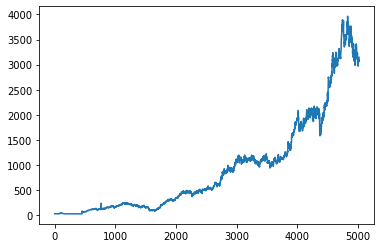

In [34]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [36]:
print(df1)

[[7.85285280e-04]
 [6.85382911e-04]
 [1.83546044e-04]
 ...
 [7.91850719e-01]
 [7.86049105e-01]
 [7.92180804e-01]]


In [37]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [38]:
training_size,test_size

(3511, 1506)

In [39]:
train_data

array([[7.85285280e-04],
       [6.85382911e-04],
       [1.83546044e-04],
       ...,
       [2.57480943e-01],
       [2.57310756e-01],
       [2.61251841e-01]])

In [40]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [41]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [42]:
print(X_train.shape), print(y_train.shape)

(3410, 100)
(3410,)


(None, None)

In [43]:
print(X_test.shape), print(ytest.shape)

(1405, 100)
(1405,)


(None, None)

In [44]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [45]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

## LSTM Model for creation of Predection

In [47]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

## Model Summary 

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
54/54 [==============================] - 26s 381ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 2/100
54/54 [==============================] - 11s 199ms/step - loss: 3.8340e-05 - val_loss: 0.0018
Epoch 3/100
54/54 [==============================] - 10s 191ms/step - loss: 3.2441e-05 - val_loss: 0.0025
Epoch 4/100
54/54 [==============================] - 10s 192ms/step - loss: 3.1345e-05 - val_loss: 0.0029
Epoch 5/100
54/54 [==============================] - 10s 193ms/step - loss: 3.2315e-05 - val_loss: 0.0025
Epoch 6/100
54/54 [==============================] - 10s 191ms/step - loss: 3.3845e-05 - val_loss: 0.0040
Epoch 7/100
54/54 [==============================] - 10s 191ms/step - loss: 3.1409e-05 - val_loss: 0.0033
Epoch 8/100
54/54 [==============================] - 11s 205ms/step - loss: 3.2795e-05 - val_loss: 0.0036
Epoch 9/100
54/54 [==============================] - 12s 214ms/step - loss: 3.2253e-05 - val_loss: 0.0035
Epoch 10/100
54/54 [==============================

In [50]:
import tensorflow as tf

In [51]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

44/44 [==============================] - 2s 34ms/step


In [52]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [53]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

560.5584393363998

In [54]:
math.sqrt(mean_squared_error(ytest,test_predict))

2263.887012815189

### Plotting 
# shift train predictions for plotting

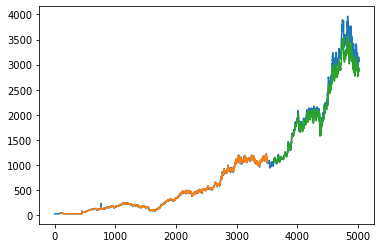

In [55]:

look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [56]:
len(test_data)
a = len(test_data)-100

In [57]:
x_input=test_data[a:].reshape(1,-1)
x_input.shape

(1, 100)

In [58]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [59]:
temp_input

[0.8459252493245147,
 0.8431721899048442,
 0.8408609787625567,
 0.8579858848588895,
 0.8623175848621897,
 0.8599939141935619,
 0.8427553846555285,
 0.8532247961045466,
 0.8590215132497758,
 0.8420481050757108,
 0.8066112905452779,
 0.8043253703818305,
 0.8032519294980706,
 0.78701102989497,
 0.7735990626480603,
 0.7795346942138304,
 0.8046790101717394,
 0.8074573605702499,
 0.8291413375286708,
 0.8251758608170062,
 0.8306315216740534,
 0.8315029446655587,
 0.8245191012071755,
 0.8186087606202456,
 0.8307326236017206,
 0.8105136017975355,
 0.8057777420343395,
 0.817004891045469,
 0.8238498200833113,
 0.818192017358623,
 0.7798883959914324,
 0.7725382672537203,
 0.7609322494615351,
 0.7528283503740788,
 0.7517774110229632,
 0.7692260788410652,
 0.7719484543525841,
 0.7948799336373704,
 0.7980455211555234,
 0.7964500199193336,
 0.7953737276016848,
 0.7824961562581587,
 0.8009705344362293,
 0.8191155720001394,
 0.8295999224832274,
 0.8288149103360924,
 0.8270421862849422,
 0.83912203800421

# demonstrate prediction for next 10 days

In [60]:

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.7356299]
101
1 day input [0.84317219 0.84086098 0.85798588 0.86231758 0.85999391 0.84275538
 0.8532248  0.85902151 0.84204811 0.80661129 0.80432537 0.80325193
 0.78701103 0.77359906 0.77953469 0.80467901 0.80745736 0.82914134
 0.82517586 0.83063152 0.83150294 0.8245191  0.81860876 0.83073262
 0.8105136  0.80577774 0.81700489 0.82384982 0.81819202 0.7798884
 0.77253827 0.76093225 0.75282835 0.75177741 0.76922608 0.77194845
 0.79487993 0.79804552 0.79645002 0.79537373 0.78249616 0.80097053
 0.81911557 0.82959992 0.82881491 0.82704219 0.83912204 0.84303464
 0.8455925  0.84797295 0.84285742 0.86014144 0.85483598 0.85259469
 0.85472198 0.84969503 0.85083467 0.84293341 0.82521882 0.81781135
 0.80840323 0.80941623 0.78671275 0.80661786 0.78649746 0.78616825
 0.78692797 0.78531988 0.79103062 0.79610816 0.80826394 0.81467112
 0.81122696 0.78363574 0.7795712  0.75534815 0.76043846 0.76335076
 0.75344885 0.75501893 0.74859918 0.75172671 0.75756409 0.76217312
 0.7524612  0.75429721 0.74933355 0

In [61]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [62]:
import matplotlib.pyplot as plt

In [63]:
len(df1)
b = len(df1)-100 

## Predectation 

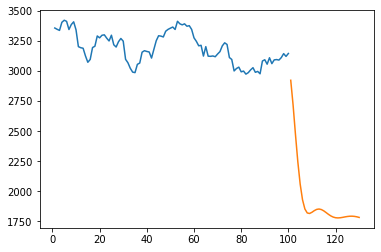

In [64]:
plt.plot(day_new,scaler.inverse_transform(df1[b:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

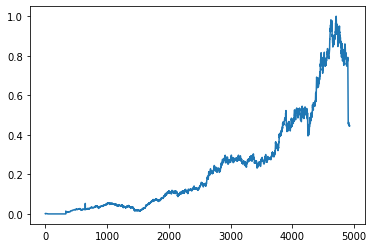

In [65]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[120:])

In [66]:
df3=scaler.inverse_transform(df3).tolist()

## Output

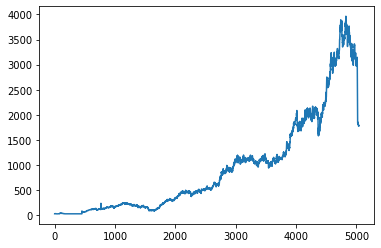

In [69]:
plt.plot(df3)